In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

# importing the churn_raw_data.csv through the file path
df = pd.read_csv('/Users/justinhuynh/Desktop/churn_clean.csv')
# check all information about this file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [37]:
# select variables that are relevant only to our analysis
features = ['Age', 'Income', 'Gender', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Tenure', 'Contract', 'TechSupport', 'Churn']
df_selected = df[features].copy()
df_selected.head()

,Age,Income,Gender,MonthlyCharge,Bandwidth_GB_Year,Tenure,Contract,TechSupport,Churn
0,68,28561.99,Male,172.455519,904.536110,6.795513,One year,No,No
1,27,21704.77,Female,242.632554,800.982766,1.156681,Month-to-month,No,Yes
2,50,9609.57,Female,159.947583,2054.706961,15.754144,Two Year,No,No
3,48,18925.23,Male,119.956840,2164.579412,17.087227,Two Year,No,No
4,83,40074.19,Male,149.948316,271.493436,1.670972,Month-to-month,Yes,Yes


In [38]:
# convert relevant categorical variables to numerical using one-hot encoding
label_encoder = LabelEncoder()
df_selected['Gender'] = label_encoder.fit_transform(df_selected['Gender'])
df_selected['Contract'] = label_encoder.fit_transform(df_selected['Contract'])
df_selected['TechSupport'] = label_encoder.fit_transform(df_selected['TechSupport'])
df_selected['Churn'] = label_encoder.fit_transform(df_selected['Churn'])
df_selected.head()

,Age,Income,Gender,MonthlyCharge,Bandwidth_GB_Year,Tenure,Contract,TechSupport,Churn
0,68,28561.99,1,172.455519,904.536110,6.795513,1,0,0
1,27,21704.77,0,242.632554,800.982766,1.156681,0,0,1
2,50,9609.57,0,159.947583,2054.706961,15.754144,2,0,0
3,48,18925.23,1,119.956840,2164.579412,17.087227,2,0,0
4,83,40074.19,1,149.948316,271.493436,1.670972,0,1,1


In [39]:
# normalize numeric variables
numeric_features = ['Age', 'Income', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Tenure']
scaler = StandardScaler()
df_selected[numeric_features] = scaler.fit_transform(df_selected[numeric_features])
df_selected.head()

,Age,Income,Gender,MonthlyCharge,Bandwidth_GB_Year,Tenure,Contract,TechSupport,Churn
0,0.720925,-0.398778,1,-0.003943,-1.138487,-1.048746,1,0,0
1,-1.259957,-0.641954,0,1.630326,-1.185876,-1.262001,0,0,1
2,-0.148730,-1.070885,0,-0.295225,-0.612138,-0.709940,2,0,0
3,-0.245359,-0.740525,1,-1.226521,-0.561857,-0.659524,2,0,0
4,1.445638,0.009478,1,-0.528086,-1.428184,-1.242551,0,1,1


In [40]:
# split data into training and testing sets
X = df_selected.drop('Churn', axis=1)
y = df_selected['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# display training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 8), (2000, 8), (8000,), (2000,))

In [41]:
# save prepared data to csv
df_selected.to_csv('prepared_data_d209_task1.csv', index=False)

In [42]:
# save the training and testing sets to CSV files
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)
# display training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 8), (2000, 8), (8000,), (2000,))

In [43]:
# create KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# predict on the test set
y_pred_knn = knn.predict(X_test)

# evaluate the model
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1456
           1       0.76      0.70      0.73       544

    accuracy                           0.86      2000
   macro avg       0.83      0.81      0.82      2000
weighted avg       0.86      0.86      0.86      2000

KNN Confusion Matrix:
[[1335  121]
 [ 162  382]]


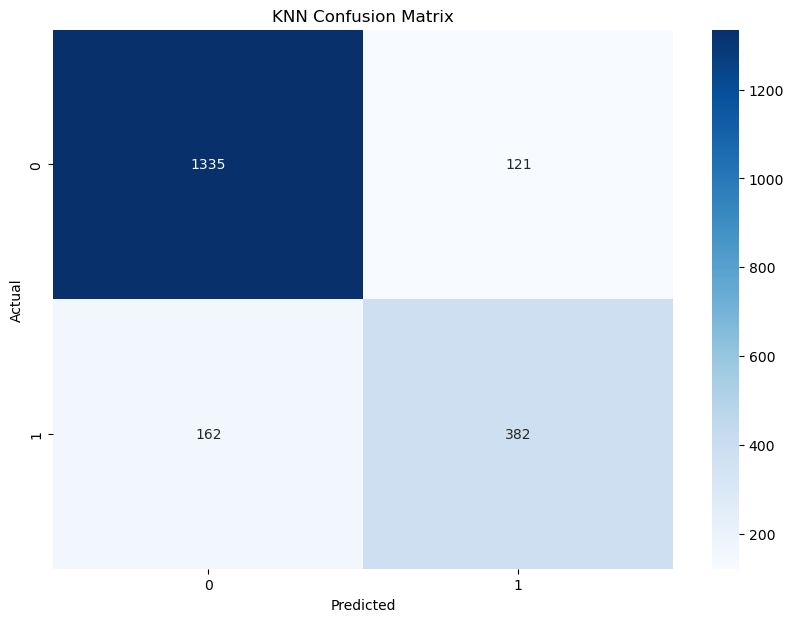

In [45]:
# plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [47]:
# calculate accuracy
accuracy = accuracy_score(y_test, y_pred_knn)

# calculate AUC
y_prob_knn = knn.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_prob_knn)

# print accuracy and AUC
print(f"Accuracy: {accuracy:.2f}")
print(f"AUC: {auc:.2f}")

Accuracy: 0.86
AUC: 0.90
